<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Citra Hasil Dilasi')

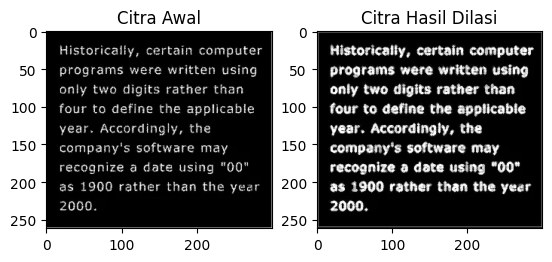

In [73]:
def dilasi (img, w):
  m, n = img.shape

  imgDilasi= np.zeros((m, n), dtype=np.uint8)

  kernel = cv.getStructuringElement(cv.MORPH_CROSS, (w,w))
  constant = (w-1) // 2

  for i in range(constant, m-constant):
      for j in range(constant, n-constant):
          temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
          product = temp * kernel
          imgDilasi[i,j] = np.max(product)

  return imgDilasi

morphology = cv.imread('/content/drive/MyDrive/PCVK/09/morphology.png',0)
w = 3

plt.subplot(121),plt.imshow(morphology, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilasi(morphology, w), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

[[0 1 0]
 [1 1 1]
 [0 1 0]]


Text(0.5, 1.0, 'Citra Hasil Dilasi')

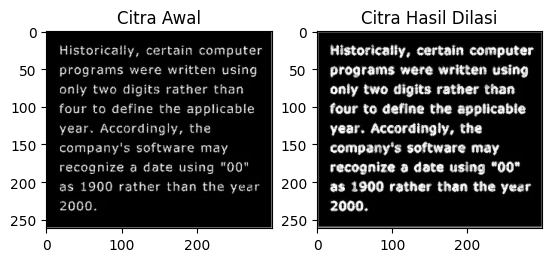

In [55]:
morphology1 = cv.imread('/content/drive/MyDrive/PCVK/09/morphology.png')
kernel1 = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
dilasi = cv.dilate(morphology1, kernel1, iterations = 1)

print(kernel1)

plt.subplot(121),plt.imshow(morphology1, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilasi, cmap = 'gray')
plt.title('Citra Hasil Dilasi')

Text(0.5, 1.0, 'Citra Hasil Dilasi')

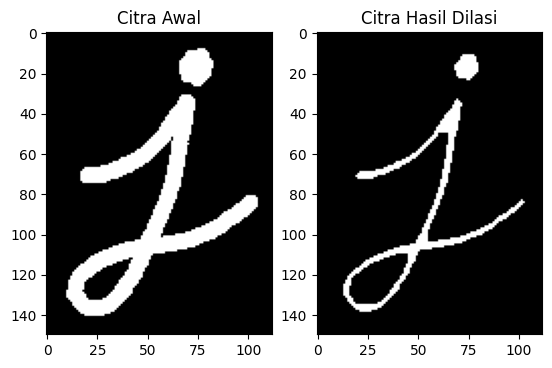

In [77]:
def erosi (img, w):
  m, n = img.shape

  kernel3 = np.ones((w,w), dtype=np.uint8)
  constant2 = (w-1) // 2

  imgErosi= np.zeros((m, n), dtype=np.uint8)

  for i in range(constant2, m-constant2): # (2, m-2)
      for j in range(constant2, n-constant2): #(2, n-2)
          temp1 = img[i-constant2:i+constant2+1, j-constant2:j+constant2+1]
          product1 = temp1 * kernel3
          imgErosi[i,j] = np.min(product1)

  return imgErosi

huruf1 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png',0)
k = 5

plt.subplot(121),plt.imshow(huruf1, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosi(huruf1, k), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

Text(0.5, 1.0, 'Citra Hasil Dilasi')

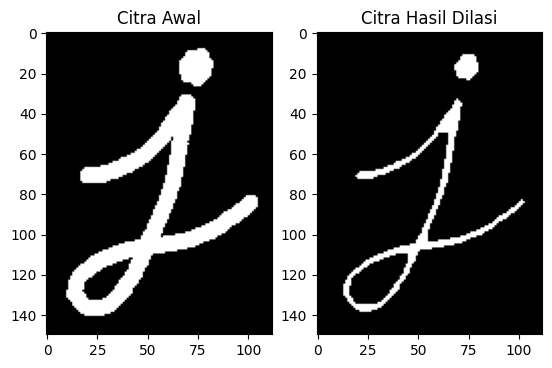

In [56]:
huruf = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

kernel2 = np.ones((5,5), np.uint8)
erosi = cv.erode(huruf, kernel2, iterations = 1)

plt.subplot(121),plt.imshow(huruf, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosi, cmap = 'gray')
plt.title('Citra Hasil Dilasi')